## Import Libraries

In [7]:
import gdown
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

%matplotlib inline

# set the max-size of the colums to display in output
pd.set_option('max_column', 30)

# plot figure size
plt.rcParams['figure.figsize'] = [12,6]

In [8]:
# Download data

url = 'https://drive.google.com/uc?id=1B4Qx7hocGAL8PaU5Qtw_zXiiQeRO4Qts'
output = 'car_price.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1B4Qx7hocGAL8PaU5Qtw_zXiiQeRO4Qts
To: G:\Deep-Learning\NLP_Task\mechademy\car_price.csv
3.99MB [00:02, 1.71MB/s]


'car_price.csv'

In [9]:
car_df = pd.read_csv('car_price.csv')

In [10]:
# show first five rows

car_df.head()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [11]:
# shape of  df 

car_df.shape

(40000, 13)

In [12]:
# print descriptive statistic on numerical columns

car_df.describe()

,Unnamed: 0,priceUSD,year,mileage(kilometers),volume(cm3)
count,40000.00000,40000.000000,40000.000000,4.000000e+04,39970.000000
mean,19999.50000,7430.383775,2003.485625,2.434332e+05,2103.201676
std,11547.14972,8338.242134,8.114896,3.167033e+05,938.724653
min,0.00000,95.000000,1938.000000,0.000000e+00,500.000000
25%,9999.75000,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,19999.50000,5350.000000,2004.000000,2.280000e+05,1995.000000
75%,29999.25000,9850.000000,2010.000000,3.087610e+05,2300.000000
max,39999.00000,195000.000000,2019.000000,9.999999e+06,20000.000000


Observations:
- Min car price is 95 and max is 19500, there is an outlier in the data
- oldest car is from the year 1938
- First quartile value (25%) lies in the year 1998. This indicated that more than 75% of the cars are new models and are built after 1998.

In [13]:
# drop usless column

car_df.drop('Unnamed: 0', inplace=True, axis=1)

In [14]:
# rename column

car_df.rename(columns={'priceUSD': 'price', 'mileage(kilometers)': 'mileage', 'volume(cm3)': 'volume'},inplace=True)

car_df.columns

Index(['make', 'model', 'price', 'year', 'condition', 'mileage', 'fuel_type',
       'volume', 'color', 'transmission', 'drive_unit', 'segment'],
      dtype='object')

In [15]:
car_df.head(2)

,make,model,price,year,condition,mileage,fuel_type,volume,color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M


In [16]:
# print some few imformation about database 

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
make            40000 non-null object
model           40000 non-null object
price           40000 non-null int64
year            40000 non-null int64
condition       40000 non-null object
mileage         40000 non-null float64
fuel_type       40000 non-null object
volume          39970 non-null float64
color           40000 non-null object
transmission    40000 non-null object
drive_unit      38655 non-null object
segment         36245 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


In [17]:
# count the data type in each column
dtype_df = pd.DataFrame(car_df.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})

dtype_df

,variableType,count
0,object,8
1,int64,2
2,float64,2


## Missing Values

In [18]:
car_df.isna().sum()

make               0
model              0
price              0
year               0
condition          0
mileage            0
fuel_type          0
volume            30
color              0
transmission       0
drive_unit      1345
segment         3755
dtype: int64

In [19]:
# list out all the NaN values of categorical variable

missing_value = [cols for cols in car_df.columns if car_df[cols].isnull().sum()]
missing_value

['volume', 'drive_unit', 'segment']

In [20]:
for i in missing_value:
    print(car_df[i].value_counts())
    print('--'* 30)

2000.0    7652
1600.0    6159
1800.0    4227
1900.0    2596
2500.0    2387
          ... 
1609.0       1
750.0        1
2193.0       1
1926.0       1
2048.0       1
Name: volume, Length: 396, dtype: int64
------------------------------------------------------------
front-wheel drive             27074
rear drive                     4809
all-wheel drive                4176
part-time four-wheel drive     2596
Name: drive_unit, dtype: int64
------------------------------------------------------------
D    8985
C    7509
J    6161
M    4532
E    4391
B    3128
F     658
S     549
A     332
Name: segment, dtype: int64
------------------------------------------------------------


## Hnadle missing values
Replace categorical variable with the most common value and numerical value with the mean value


In [21]:
# replace categorical variable with the most common value and numerical value with the mean value

for cols in missing_value:
    if car_df[cols].dtype == 'O':
        print(car_df[cols].value_counts().index[0])
        car_df[cols].fillna(car_df[cols].value_counts().index[0], inplace=True)
    else:
        print(car_df[cols].value_counts().index[0])
        car_df[cols].fillna(car_df[cols].mean(), inplace=True)

2000.0
front-wheel drive
D


In [22]:
car_df.isna().sum()

make            0
model           0
price           0
year            0
condition       0
mileage         0
fuel_type       0
volume          0
color           0
transmission    0
drive_unit      0
segment         0
dtype: int64

In [23]:
car_df['segment'].unique()

array(['D', 'M', 'A', 'J', 'C', 'E', 'F', 'B', 'S'], dtype=object)

## Numerical values

In [24]:
# dataframe of all columns with numerical values
numeric_col = [num_col for num_col in car_df.columns if car_df[num_col].dtype != 'O']

car_df[numeric_col].head()

,price,year,mileage,volume
0,565,1993,960015.0,2000.0
1,5550,2008,172000.0,1400.0
2,8300,2008,223000.0,2500.0
3,3300,2005,140000.0,1200.0
4,2450,2002,413000.0,2200.0


In [25]:
# list of all those columns which contain years or data (Temporal variables)

year_cols = [y for y in car_df.columns if 'yr' in y or 'year' in y]

car_df[year_cols].head(4)

,year
0,1993
1,2008
2,2008
3,2005


In [26]:
# check the data type of the year columns
car_df[year_cols].dtypes

year    int64
dtype: object

Observation:
- As you can see the year is not in datetime formate we need to convert it into data time formate

In [27]:
# check the value in yar column
car_df[year_cols[0]].unique()

array([1993, 2008, 2005, 2002, 2016, 1997, 1991, 2004, 2013, 2014, 2012,
       2015, 1998, 2011, 2003, 1982, 1968, 2001, 2006, 2009, 2018, 2000,
       1995, 2007, 1989, 1999, 1988, 2010, 1954, 1996, 1992, 1990, 1994,
       1986, 2017, 1987, 1966, 1985, 1961, 1984, 2019, 1983, 1976, 1978,
       1955, 1980, 1962, 1981, 1970, 1975, 1977, 1969, 1963, 1965, 1979,
       1950, 1972, 1967, 1938, 1959, 1964, 1952, 1956, 1973, 1960, 1958,
       1957, 1949, 1951, 1945, 1974, 1971], dtype=int64)

In [28]:
car_df.columns

Index(['make', 'model', 'price', 'year', 'condition', 'mileage', 'fuel_type',
       'volume', 'color', 'transmission', 'drive_unit', 'segment'],
      dtype='object')

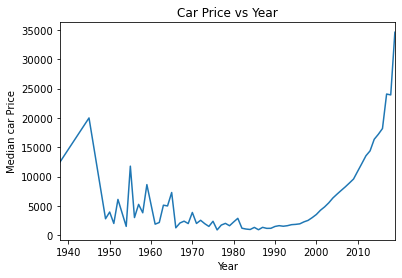

In [29]:
# Lets analyze the Datetime columns
# We will check whether there is a relation between year made and the price, mileage, condition

car_df.groupby(year_cols[0])['price'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Median car Price')
plt.title("Car Price vs Year")
plt.show()

Observation:
- Average price for Car made in between 1938 to 1945 and between 2010 to 2019are higher
- There is a share fall in car price in 1945
- In mid 1995 the average car price statred to increase

### 1. Discrete Variables
Numerical variables are usually of 2 type

In [30]:
discrete_cols = [cols for cols in numeric_col if len(car_df[cols].unique()) < 25 and cols not in year_cols]

print('The number of discrete valye is:', len(discrete_cols))

The number of discrete valye is: 0


### 2. Continuous Variable

In [31]:
continuous_cols = [cols for cols in numeric_col if cols not in discrete_cols + year_cols]

print('The number of numeric columns are:', len(continuous_cols), '\n',continuous_cols)

The number of numeric columns are: 3 
 ['price', 'mileage', 'volume']


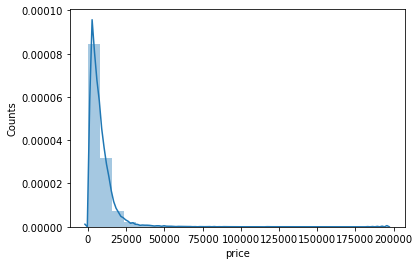

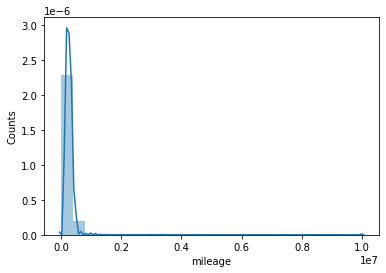

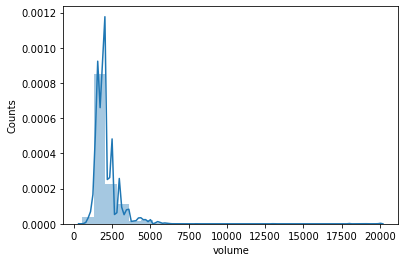

In [32]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for cols in continuous_cols:
    sns.distplot(car_df[cols], bins=25)
    plt.xlabel(cols)
    plt.ylabel('Counts')
    plt.show()

Since the continuous data does not follow normal distribution we have to do **feature scaling**

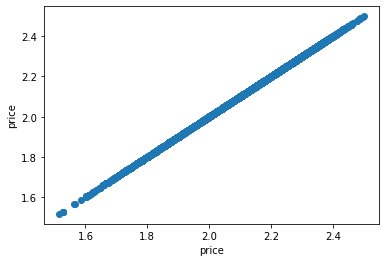

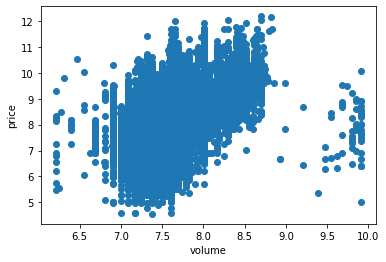

In [33]:
for cols in continuous_cols:
    car_df_copy = car_df.copy(deep=True)
    
    if 0 in car_df_copy[cols].unique():
        pass
    else:
        car_df_copy[cols] = np.log(car_df_copy[cols])
        car_df_copy['price'] = np.log(car_df_copy['price'])
        
        plt.scatter(car_df_copy[cols],car_df_copy['price'])
        plt.xlabel(cols)
        plt.ylabel('price')
        plt.show()

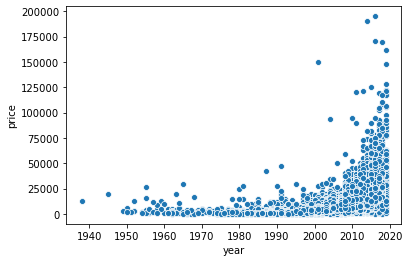

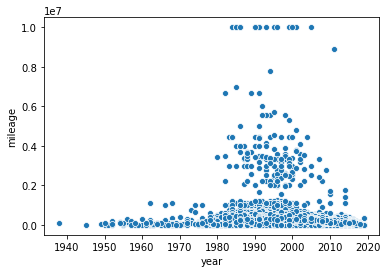

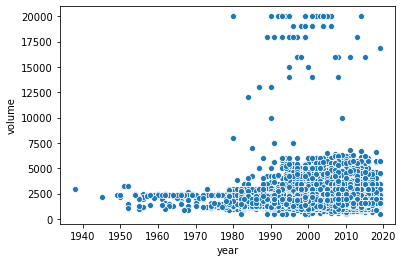

In [34]:
# Lets analyze the Datetime columns with contin
# We will check if there is a relation between year made, mileage, condition, volume

for cols in continuous_cols:
    sns.scatterplot(x=year_cols[0], y=cols, data=car_df)
    plt.ylabel(cols)
    plt.xlabel(year_cols[0])
    plt.show()

Observation:
- car price started to increas between year 2000 to 2019
- Few car made between 1985 to 2005 give higher mileage
- Most of the car made after 1980 have larger volume

## Categorical varaibles

In [35]:
# list all the categorical columns
categorical_cols = [cols for cols in car_df.columns if car_df[cols].dtype == 'O']
categorical_cols
print('The number of categoricl columns are:', len(categorical_cols), '\n', categorical_cols)

The number of categoricl columns are: 8 
 ['make', 'model', 'condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']


In [36]:
# check the number of unique value in each columns
for cols in categorical_cols:
    print('{} has {} categories --> {}'.format(cols, len(car_df[cols].unique()), car_df[cols].unique()))
    print('--'*40)

make has 93 categories --> ['honda' 'ford' 'nissan' 'volkswagen' 'mitsubishi' 'renault' 'audi'
 'daewoo' 'toyota' 'opel' 'chevrolet' 'mercedes-benz' 'lexus' 'bmw' 'gaz'
 'volvo' 'jaguar' 'suzuki' 'lada-vaz' 'hyundai' 'citroen' 'alfa-romeo'
 'mazda' 'land-rover' 'saab' 'kia' 'ssangyong' 'geely' 'fiat' 'peugeot'
 'rover' 'skoda' 'seat' 'changan' 'cadillac' 'subaru' 'uaz' 'moskvich'
 'lifan' 'chrysler' 'maserati' 'buick' 'infiniti' 'gmc' 'porsche' 'acura'
 'pontiac' 'jeep' 'great-wall' 'zaz' 'smart' 'datsun' 'eksklyuziv' 'mini'
 'luaz' 'roewe' 'proton' 'izh' 'dacia' 'daihatsu' 'chery' 'mg' 'hafei'
 'lancia' 'raf' 'shanghai-maple' 'lincoln' 'isuzu' 'iran-khodro' 'scion'
 'saturn' 'haval' 'ravon' 'tesla' 'plymouth' 'mercury' 'vortex' 'wartburg'
 'aro' 'tata' 'zotye' 'saipa' 'oldsmobile' 'bentley' 'faw' 'jac' 'fso'
 'dong-feng' 'bogdan' 'byd' 'aston-martin' 'tagaz' 'mclaren']
--------------------------------------------------------------------------------
model has 991 categories --> ['accor

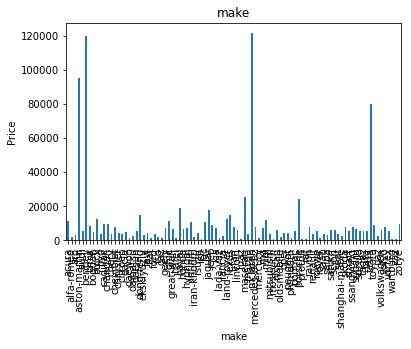

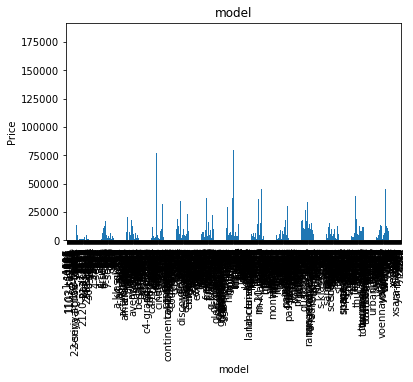

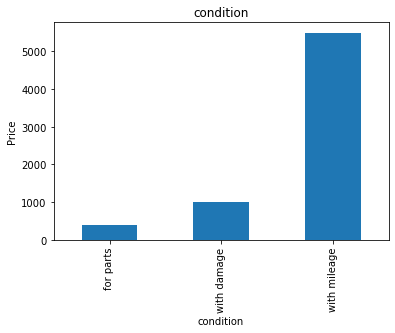

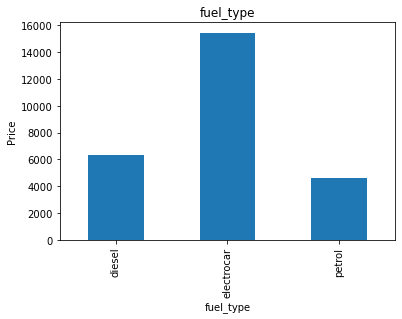

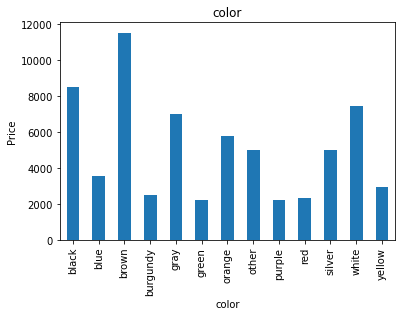

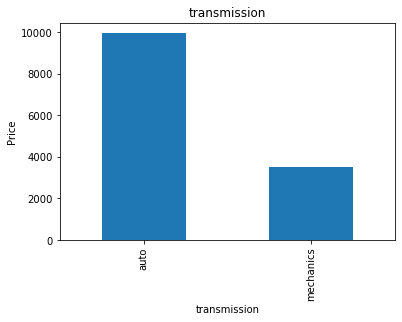

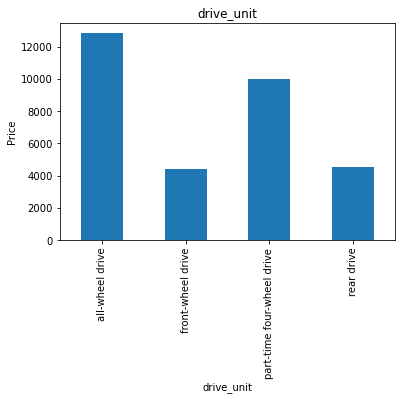

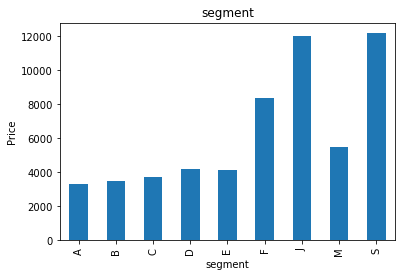

In [37]:
# Find out the relationship between categorical variable and dependent feature Price

for cols in categorical_cols:
    car_df_copy = car_df.copy(deep=True)
    
    car_df_copy.groupby(cols)['price'].median().plot.bar()
    plt.ylabel('Price')
    plt.title(cols)
    plt.show()

Observation:
- We have seen that some of the car maker like mecleran, tesla, bentley are very expensive
- car with high mileage are expensive
- Electro car are costly and petrol car are cheap
- Most favourable car color are brown, white, black
- Automatic, all-four-wheel drive car are costly
- Segment A is econimical and J,S are costly

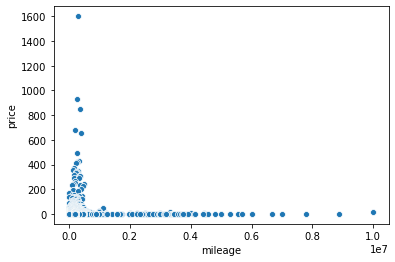

In [38]:
# Find out the relationship between mileage and Price

brand_of_car = car_df.groupby('mileage')['price'].count().reset_index().sort_values('price',ascending = False)
sns.scatterplot(data=brand_of_car, x='mileage', y='price')
plt.show()

Observation:
- some car give low mileage and cost more
- Most of the care are low milege and low cost

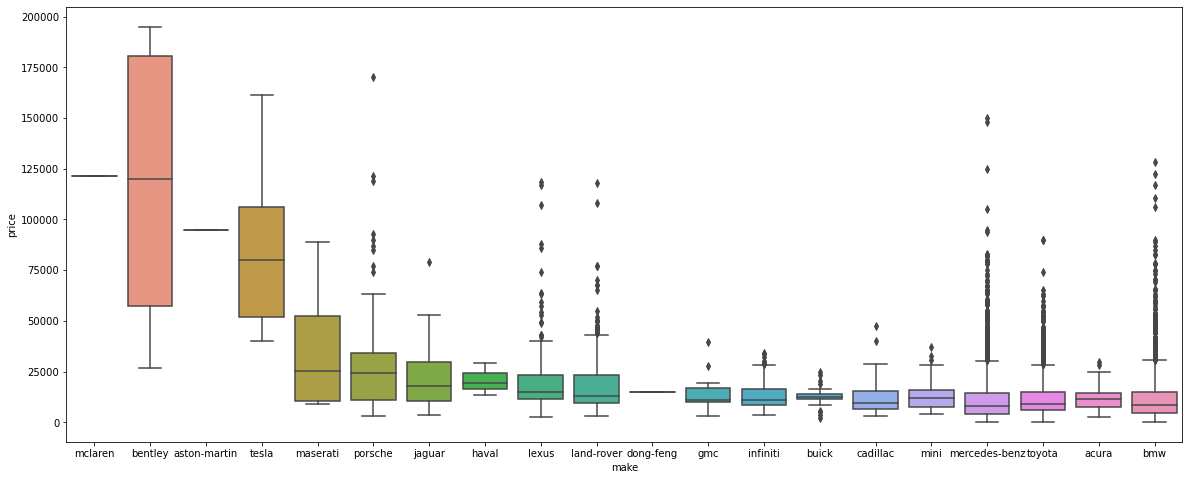

In [39]:
plt.figure(figsize=(20,8))
sorted_nb = car_df.groupby('make')['price'].mean().sort_values(ascending=False).head(20)
sns.boxplot(x=car_df['make'], y=car_df['price'], order=list(sorted_nb.index))

Observation:
-  car brand like mclaren, bentley, aston-martin, tesla are very costly

## Outliers

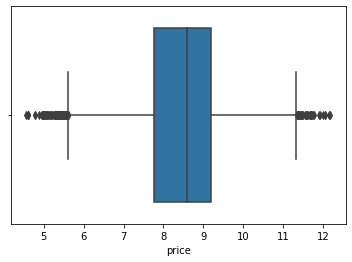

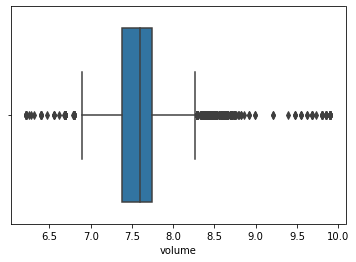

In [40]:
# vislualize the outliers

for cols in continuous_cols:
    car_df_copy = car_df.copy(deep=True)
    
    if 0 in car_df_copy[cols].unique():
        pass
    else:
        car_df_copy[cols]= np.log(car_df_copy[cols])
        sns.boxplot(car_df_copy[cols])
        plt.show()

## z-score (statistical method) 

In [41]:
# calculate z score
z = np.abs(stats.zscore(car_df[continuous_cols]))

print(z)

[[0.82337134 2.26265667 0.1099808 ]
 [0.22551603 0.22555528 0.74939368]
 [0.10429382 0.06451924 0.42286327]
 ...
 [0.41140886 0.76865719 0.10315683]
 [0.74721525 0.02073513 0.8559625 ]
 [0.80190372 0.09128785 0.11317787]]


In [42]:
# any data point with z-score greater then 3 is an outlier

threshold = 3
print(np.where(z>3))

(array([   12,    34,    42, ..., 39959, 39974, 39974], dtype=int64), array([0, 2, 0, ..., 0, 0, 2], dtype=int64))


In [43]:
# Take random data (55 is the row no and 1 is the column no )

print(z[55][1])
print(z[245][2])

1.6872275583738348
0.10998080201335962


## Remove outlier (z-score)

In [44]:
new_df = car_df[(z < 3).all(axis=1)]

In [45]:
# check the shape of new and old df

car_df.shape, new_df.shape

((40000, 12), (38804, 12))

## Dependent and indpendent variable

In [46]:
x = new_df.drop('price', axis=1)
y = new_df['price']

## Encoding
We will use label encoding to encode the data

In [47]:
x = x.apply(LabelEncoder().fit_transform)

x.head()

,make,model,year,condition,mileage,fuel_type,volume,color,transmission,drive_unit,segment
0,30,165,45,2,6104,2,203,0,1,1,3
1,22,405,60,2,2463,0,78,10,1,1,7
2,55,798,60,2,3216,2,274,8,0,1,3
3,83,399,57,2,2028,2,27,1,1,1,0
4,55,643,54,1,5579,0,228,3,1,1,3


## Train test split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31043, 11), (7761, 11), (31043,), (7761,))

## Feature Scaling

In [49]:
x_train['mileage'] = MinMaxScaler().fit_transform(x_train[['mileage']])

C:\Users\Benai\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
x_train.head()

,make,model,year,condition,mileage,fuel_type,volume,color,transmission,drive_unit,segment
10175,22,228,56,2,0.433901,2,155,0,1,1,7
12588,39,264,66,2,0.334424,2,78,7,1,1,2
26249,81,921,60,2,0.486420,2,49,0,1,1,1
178,21,740,60,2,0.292703,2,116,7,1,2,3
36317,3,162,60,2,0.463842,2,328,0,0,0,5


## Statistical analysis

In [51]:
# T-test

stats.ttest_ind(new_df['mileage'], new_df['volume'])

Ttest_indResult(statistic=341.9984352926145, pvalue=0.0)

Got very large t-score shows that there is no relationship between the two

In [52]:
# only  categorical variable
from sklearn.feature_selection import SelectKBest, chi2

cs_feature = SelectKBest(chi2,  k=10).fit(x, y)

final_cs_feature = x.columns[cs_feature.get_support()]

print('Before feature selection -->', x.shape[1])
print('After feature selection --->',final_cs_feature.shape[0])
print('\nSelected features ---->',final_cs_feature)

Before feature selection --> 11
After feature selection ---> 10

Selected features ----> Index(['make', 'model', 'year', 'mileage', 'fuel_type', 'volume', 'color',
       'transmission', 'drive_unit', 'segment'],
      dtype='object')


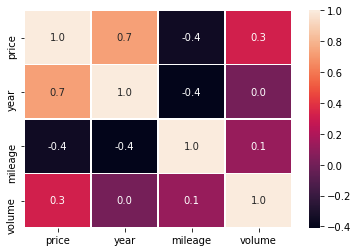

In [53]:
# correlation

sns.heatmap(new_df.corr(), annot=True, linewidths=.5, fmt= '.1f')

Observation:
- price and mileage have a week negative relationship  same case with the year and mileage
- non of the feature have strong linear relationship

In [54]:
# It will return test statistics, p-value, degree of freedom and expected values.

stat, p, dof, expected = stats.chi2_contingency(x)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 0.0
Dependent (reject H0)


## Feature selection

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
f = clf.feature_importances_

final_dfs = pd.DataFrame({"Features": x_train.columns, "Importances":f})

final_dfs = final_dfs.sort_values('Importances', ascending=False)

final_dfs

,Features,Importances
4,mileage,0.350725
7,color,0.169402
1,model,0.101474
2,year,0.094303
6,volume,0.087386
0,make,0.070684
10,segment,0.032750
8,transmission,0.031441
5,fuel_type,0.030299
9,drive_unit,0.028090


In [56]:
# we will use the top 8 feature to train out model

X_new = x[final_dfs.Features[0:8]]

y_new = y

X_new.head(2)

,mileage,color,model,year,volume,make,segment,transmission
0,6104,0,165,45,203,30,3,1
1,2463,10,405,60,78,22,7,1


In [57]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((31043, 8), (7761, 8), (31043,), (7761,))

## Modeling
We will be using Ensemble technique (Stacking) for modeling

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score, mean_squared_error

## Stacking model

In [90]:
def stacking_model(x_train, y_train):
    # define the base models
    base_model = list()
    base_model.append(('dtc',DecisionTreeRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=4)))
    base_model.append(('knnc', KNeighborsRegressor(n_neighbors=3)))
    base_model.append(('svc', SVR(degree=5)))
    base_model.append(('rfc', RandomForestRegressor(n_estimators=120)))
    base_model.append(('laso', Lasso()))
    base_model.append(('extr_tree', ExtraTreesRegressor()))

    # define meta learner model
    mata_model = LinearRegression()

    # define the stacking ensemble
    model = StackingRegressor(estimators=base_model, final_estimator=mata_model, cv=5)
    
    # save model
    model_name = "car_price_model.sav"  
    joblib.dump(xgbc, model_name)

    # fit the model on all available data
    return model.fit(x_train, y_train)

In [91]:
def evaluation(x_true, y_predict):
    mse = mean_squared_error(x_true, y_predict)
    rmse = np.sqrt(mse)
    r_square = r2_score(x_true, y_predict)
    return mse, rmse, r_square

In [92]:
# train model

model = stacking_model(x_train, y_train)

In [62]:
y_predict = model.predict(x_test)

In [63]:
mse, rmse, r_squared = evaluation(y_test, y_predict)

print('Mean square error : ', mse)
print('\nRoot Mean square error : ', rmse)
print('\nR squared :', r_squared)

Mean square error :  2501456.0660669566

Root Mean square error :  1581.599211578887

R squared : 0.9245379079065306


## Boosting Model

In [64]:
from xgboost import XGBRegressor

In [65]:
xgbc = XGBRegressor(max_depth=11,n_estimators=300,learning_rate=0.01)
    
# Train Adaboost Classifer
xgbc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_xgbc = xgbc.predict(x_test)

In [66]:
mse, rmse, r_squared = evaluation(y_test, y_pred_xgbc)

print('Mean square error : ', mse)
print('\nRoot Mean square error : ', rmse)
print('\nR squared :', r_squared)

Mean square error :  2800327.8903651857

Root Mean square error :  1673.41802618628

R squared : 0.9155217618965


## Save model

In [67]:
import joblib

In [68]:
model_name = "car_price_model.pkl"  
joblib.dump(xgbc, model_name)

['car_price_model.pkl']

In [93]:
car_price_model = joblib.load('car_price_model.pkl')

car_price_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)